# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

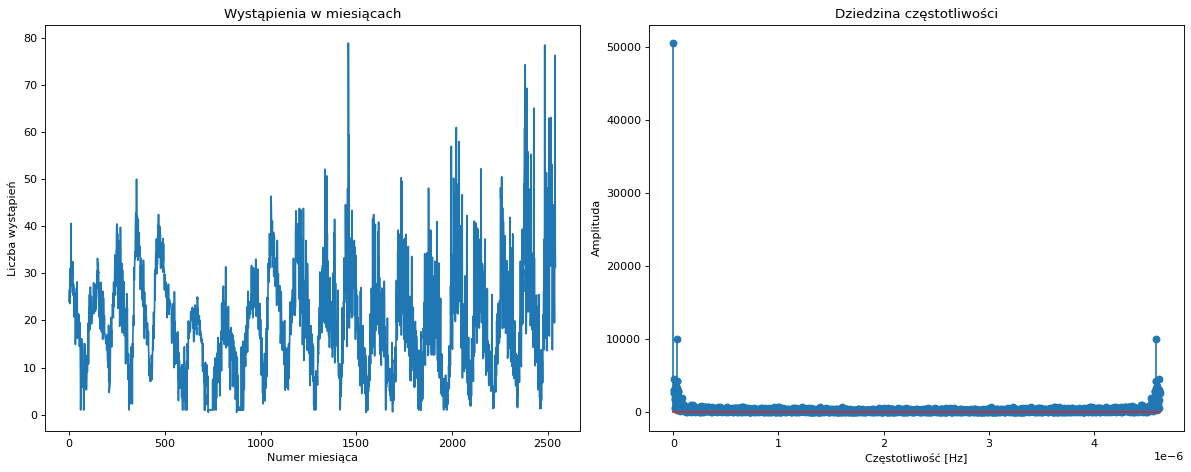

Dominująca częstotliwość: 3.46e-08 Hz
Okres cyklu aktywności słonecznej: 11.15 lat


In [12]:
from numpy import *
import matplotlib.pyplot as plt

data = genfromtxt('spots.txt')  
data_f = abs(fft.fft(data))  
n = len(data) 

w = 1 / (24 * 3600 * 30/12) # 1 miesiąc w sekundach
freqs = linspace(0, w*(n-1)/n, n) # Przestrzeń częstotliwości

plt.figure(figsize=(15, 6), dpi=80)

# Wykres sygnału w dziedzinie czasu
plt.subplot(1, 2, 1)
plt.title('Wystąpienia w miesiącach')
plt.ylabel('Liczba wystąpień')
plt.xlabel('Numer miesiąca')
plt.plot(data)

# Wykres sygnału w dziedzinie częstotliwości
plt.subplot(1, 2, 2)
plt.title('Dziedzina częstotliwości')
plt.stem(freqs, data_f, '-*') 
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

# Szukanie dominującej częstotliwości
dominant_freq_index = argmax(data_f[1:]) + 1  # Największa amplituda (pomijamy zerową składową)
dominant_freq = freqs[dominant_freq_index]

# Przeliczenie dominującej częstotliwości na okres w miesiącach.
period = 1 / dominant_freq / (30 * 24 * 3600)
print(f"Dominująca częstotliwość: {dominant_freq:.2e} Hz")
print(f"Okres cyklu aktywności słonecznej: {period:.2f} lat")

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

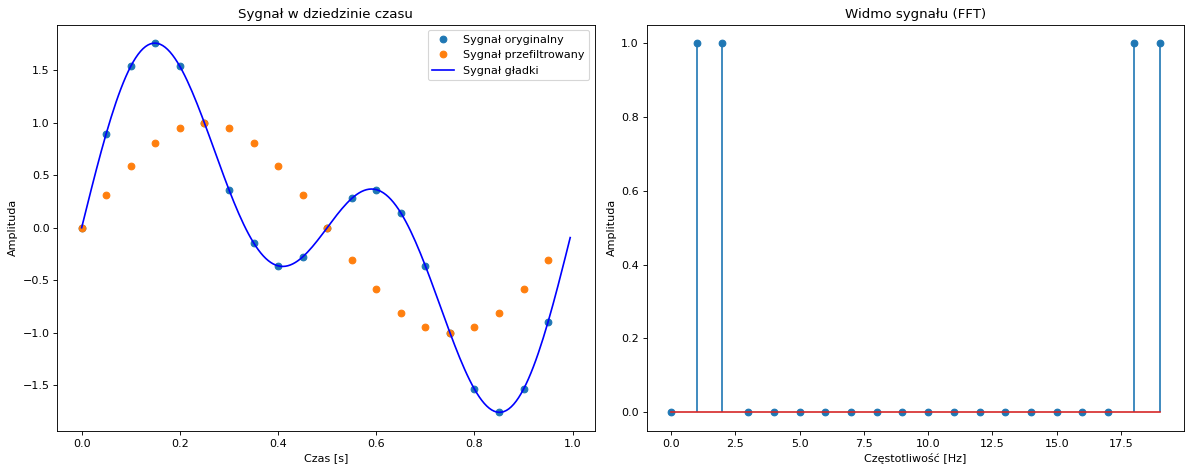

In [13]:
LP = 1.0
T = 1.0         
w = 20.0         
TW = 1.0 / w     
t = arange(0, LP*T, TW)  
n = len(t)    

FUNC = lambda t: sin(2*pi*t) + sin(4*pi*t)
signal = FUNC(t)

base_t = arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
 
freqs = linspace(0, w*(n-1)/n, n)
signal_f = fft.fft(signal)
abs_signal_f = abs(signal_f)/(n/2) 

# Znajdź indeksy częstotliwości 2 Hz (i część symetryczną)
to_filter = where(isclose(freqs, 2, atol=0.1))[0]  # Indeksy dla dodatniej częstotliwości
to_filter_sym = where(isclose(freqs, w - 2, atol=0.1))[0]  # Indeksy dla częstotliwości symetrycznej
to_filter = concatenate((to_filter, to_filter_sym))  # Połącz indeksy

# Wyzerowanie wybranych częstotliwości
filtered_signal_f = copy(signal_f)
filtered_signal_f[to_filter] = 0
filtered_signal = real(fft.ifft(filtered_signal_f))  # Przekształcenie do dziedziny czasu

plt.figure(figsize=(15, 6), dpi=80)

# Wykres sygnału w dziedzinie czasu
plt.subplot(1, 2, 1)
plt.title('Sygnał w dziedzinie czasu')
plt.ylabel('Amplituda')
plt.xlabel('Czas [s]')
plt.plot(t, signal, 'o', label='Sygnał oryginalny')
plt.plot(t, filtered_signal, 'o', label='Sygnał przefiltrowany')
plt.plot(base_t, base_signal, color='blue', label='Sygnał gładki')
plt.legend()

# Wykres sygnału w dziedzinie częstotliwości
plt.subplot(1, 2, 2)
plt.title('Widmo sygnału (FFT)')
plt.stem(freqs, abs_signal_f)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

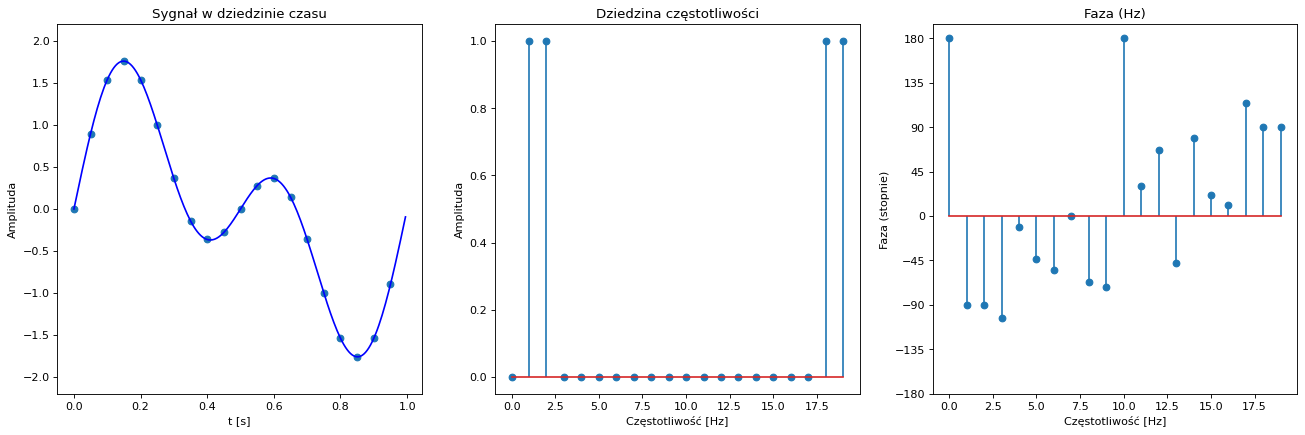

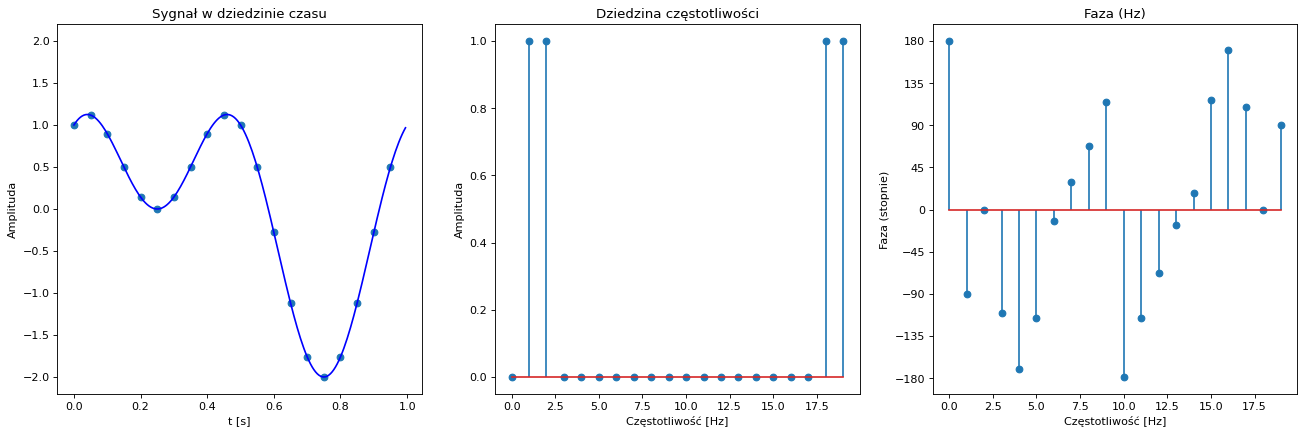

In [8]:
def func_1(t):
    return sin(2*pi*t) + sin(4*pi*t)

def func_2(t):
    return sin(2*pi*t) + cos(4*pi*t)
    
LP = 1.0
T = 1.0         
w = 20.0         
TW = 1.0 / w     
t = arange(0, LP*T, TW)  
n = len(t)    

funcs = [func_1, func_2]

for func in funcs:
    signal = func(t)

    base_t = arange(0, LP*T, 1.0/200.0)
    base_signal = func(base_t)

    freqs = linspace(0, w*(n-1)/n, n)
    signal_f = fft.fft(signal)
    abs_signal_f = abs(signal_f)/(n/2)
    
    #Faza każdej składowej częstotliwości sygnału po przekształcenia Fouriera.
    phase = angle(signal_f, deg=True)

    plt.figure(figsize=(20, 6), dpi=80)
    
    plt.subplot(1, 3, 1)
    plt.title('Sygnał w dziedzinie czasu')
    plt.ylabel('Amplituda')
    plt.xlabel('t [s]')
    plt.ylim(-2.2, 2.2)
    plt.plot(t, signal, 'o')
    plt.plot(base_t, base_signal, color='blue')
    
    plt.subplot(1, 3, 2)
    plt.title('Dziedzina częstotliwości')
    plt.stem(freqs, abs_signal_f)
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    
    plt.subplot(1, 3, 3)
    plt.title('Faza (Hz)')
    plt.stem(freqs, phase)
    plt.yticks(range(-180, 181, 45))
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Faza (stopnie)')
    
    plt.show()

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


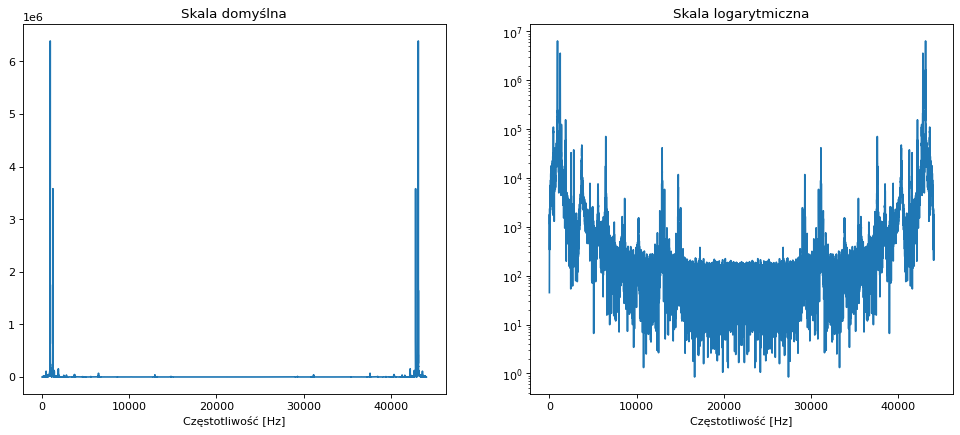

[  929.74183167   930.77030714   931.79878262   932.8272581
  1242.39837683  1243.42685231 42857.60162317 42858.63009865
 43168.20121738 43169.22969286 43170.25816833 43171.28664381]


In [9]:
import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')
signal = signal[:, 0]
signal_fft = fft.fft(signal)
abs_signal_fft = abs(signal_fft)
freqs = linspace(0, w, len(signal))

plt.figure(figsize=(15, 6), dpi=80)

plt.subplot(1, 2, 1)
plt.title('Skala domyślna')
plt.xlabel('Częstotliwość [Hz]')
plt.plot(freqs, abs_signal_fft)

plt.subplot(1, 2, 2)
plt.title('Skala logarytmiczna')
plt.xlabel('Częstotliwość [Hz]')
plt.plot(freqs, abs_signal_fft)
plt.yscale('log')

plt.show()

dominant_freqs = freqs[abs_signal_fft > 3e6]
print(dominant_freqs)